In [2]:
import requests
from time import sleep, strftime
import random
from random import randint
from bs4 import BeautifulSoup
from selenium import webdriver
import shutil
import pickle
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train_73clases_filtrado_1000_2000.csv')

In [3]:
df['landmark_id'] = df['landmark_id'].astype('string')

In [4]:
df

id                                                url  \
0      224d07dda87c1437  https://lh3.googleusercontent.com/-unDLIDYF4No...   
1      0dded77c417ef347  https://lh5.googleusercontent.com/-SEx_ro6P1Ls...   
2      34595cf8aa7eca4e  https://lh4.googleusercontent.com/-EfxlxC4Y9J4...   
3      faf7b6c9b93a01eb  https://lh5.googleusercontent.com/-FpiQOHexVUo...   
4      f4c0579589f81ace  http://lh6.ggpht.com/-NQlhs1l4VU4/RrzViOJhbUI/...   
...                 ...                                                ...   
96821  3ca87c633c5e0c38  https://lh4.googleusercontent.com/-WJ4qbh5mSrM...   
96822  e292490a84faaaf8  https://lh5.googleusercontent.com/-eMXCycjGKhQ...   
96823  859a1f46b0e900f2  http://lh3.ggpht.com/-txQp2NxZdlI/SOoSiyB9DlI/...   
96824  677b9c1db5071a0d  https://lh6.googleusercontent.com/-4XuRcO4G-6A...   
96825  a8fd1d3bf31f2c16  http://lh5.ggpht.com/-fWAqU51RSps/SsTloss-biI/...   

      landmark_id  
0             152  
1             152  
2             152  
3             152  
4             152  
...           ...  
96821       13876  
96822       13876  
96823       13876  
96824       13876  
96825       13876  

[96826 rows x 3 columns]

# We choose our landmark ids

In [5]:
landmarks = ["152","165", "1310", "1472", "1602", "7000", "7008", "12647", "13332", "13876"]

In [6]:
df10 = df[df['landmark_id'].isin(landmarks)]

In [7]:
df10 #links from our 10 chosen classes

id                                                url  \
0      224d07dda87c1437  https://lh3.googleusercontent.com/-unDLIDYF4No...   
1      0dded77c417ef347  https://lh5.googleusercontent.com/-SEx_ro6P1Ls...   
2      34595cf8aa7eca4e  https://lh4.googleusercontent.com/-EfxlxC4Y9J4...   
3      faf7b6c9b93a01eb  https://lh5.googleusercontent.com/-FpiQOHexVUo...   
4      f4c0579589f81ace  http://lh6.ggpht.com/-NQlhs1l4VU4/RrzViOJhbUI/...   
...                 ...                                                ...   
96821  3ca87c633c5e0c38  https://lh4.googleusercontent.com/-WJ4qbh5mSrM...   
96822  e292490a84faaaf8  https://lh5.googleusercontent.com/-eMXCycjGKhQ...   
96823  859a1f46b0e900f2  http://lh3.ggpht.com/-txQp2NxZdlI/SOoSiyB9DlI/...   
96824  677b9c1db5071a0d  https://lh6.googleusercontent.com/-4XuRcO4G-6A...   
96825  a8fd1d3bf31f2c16  http://lh5.ggpht.com/-fWAqU51RSps/SsTloss-biI/...   

      landmark_id  
0             152  
1             152  
2             152  
3             152  
4             152  
...           ...  
96821       13876  
96822       13876  
96823       13876  
96824       13876  
96825       13876  

[12436 rows x 3 columns]

In [8]:
#to show photos from our images
dfimages = pd.DataFrame(columns = df10.columns)
dfimages

Empty DataFrame
Columns: [id, url, landmark_id]
Index: []

In [9]:
for i in landmarks:
    a = df10[df10['landmark_id']==i].head(1)
    dfimages = pd.concat((dfimages,a),axis=0)

In [10]:
#show some images from the classes we are going to choose
dfimages = dfimages.sort_values('landmark_id').reset_index(drop=True)
dfimages

id                                                url  \
0  9a4c6194c17b0f0e  http://lh3.ggpht.com/-Cgm3B75leMc/Rby5jWz11eI/...   
1  3012983766fb64aa  https://lh4.googleusercontent.com/-9xpUMMQ1gkM...   
2  13ca2695a2a605e5  https://lh6.googleusercontent.com/-iQ3HNSX7OQY...   
3  87bb139b90ee08d9  http://lh6.ggpht.com/-dYuul3_QB9w/Rw_dWr2Y8mI/...   
4  5ae74004b132839b  https://lh4.googleusercontent.com/-uG5vVA8sJp8...   
5  224d07dda87c1437  https://lh3.googleusercontent.com/-unDLIDYF4No...   
6  57e8aa04767675c3  http://lh4.ggpht.com/-UCUfsf-EtOs/SPqSYBBFoDI/...   
7  456ea29c5b957ddf  http://lh3.ggpht.com/-fK5E-UyAeBE/SaP3CzysQKI/...   
8  838df77cfe399ee9  https://lh3.googleusercontent.com/-ppgOps6SW3I...   
9  c11c82b7349ab18b  https://lh6.googleusercontent.com/-LI7oUawnuq0...   

  landmark_id  
0       12647  
1        1310  
2       13332  
3       13876  
4        1472  
5         152  
6        1602  
7         165  
8        7000  
9        7008

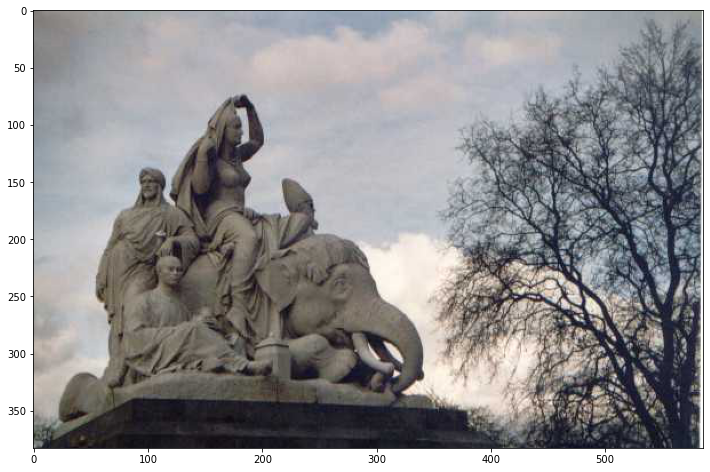

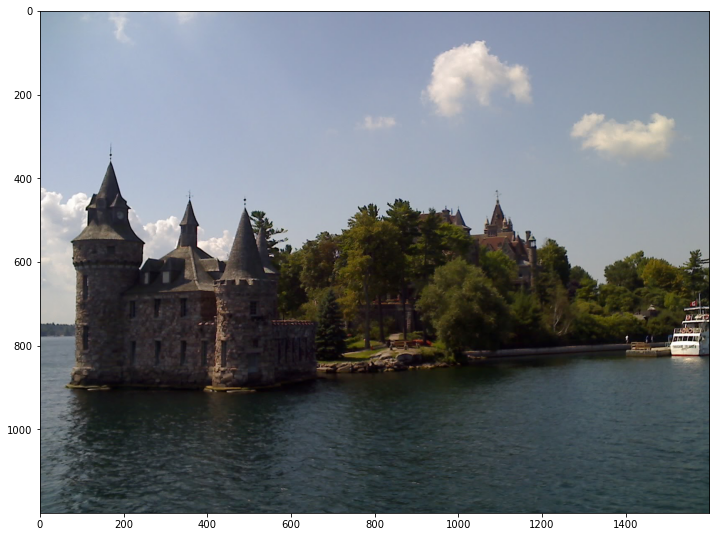

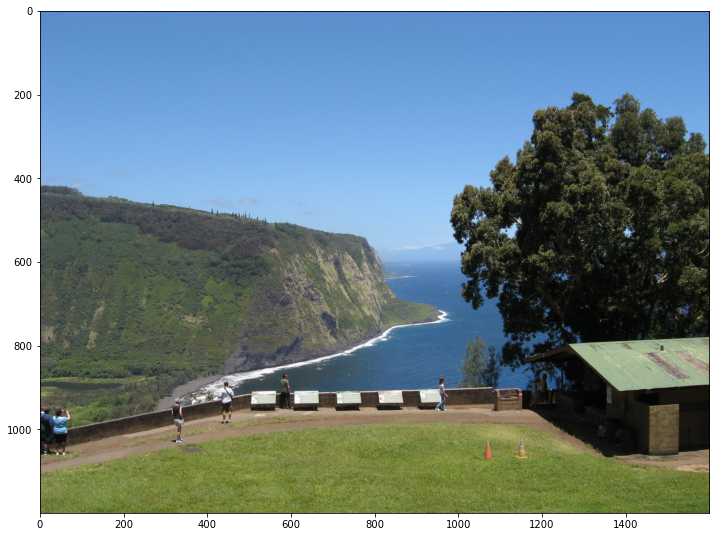

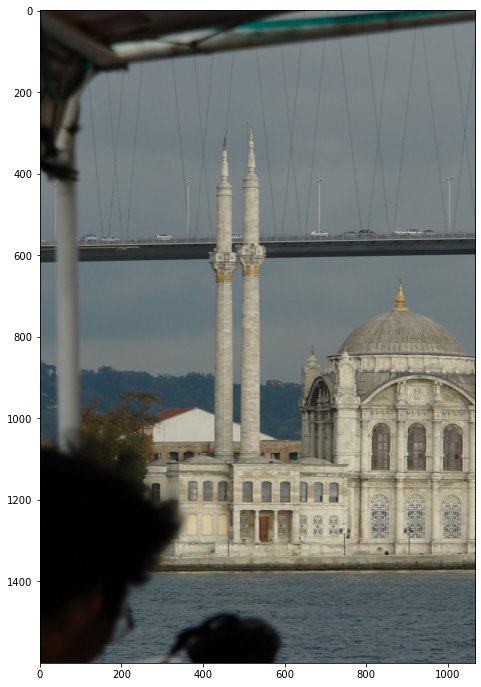

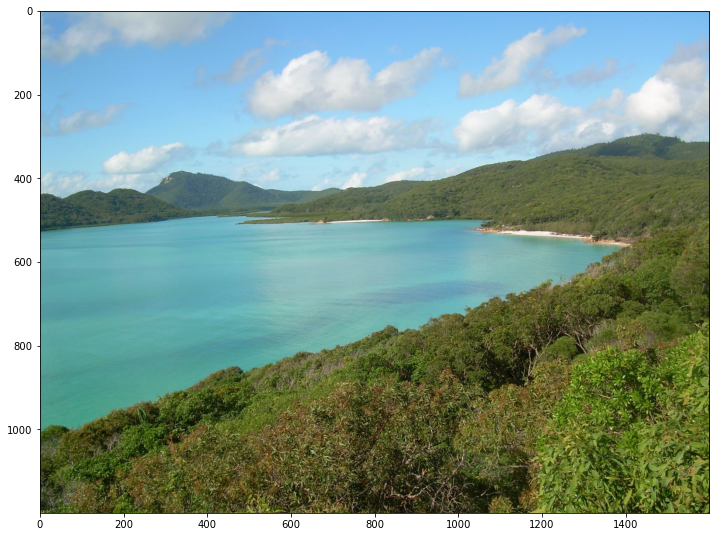

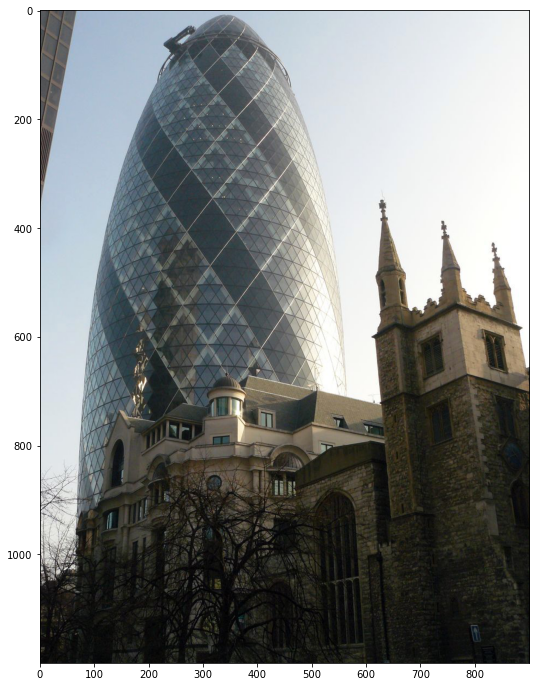

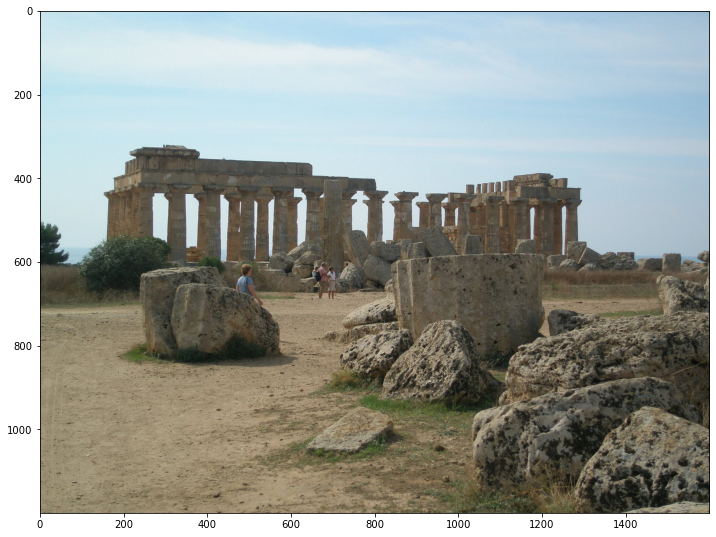

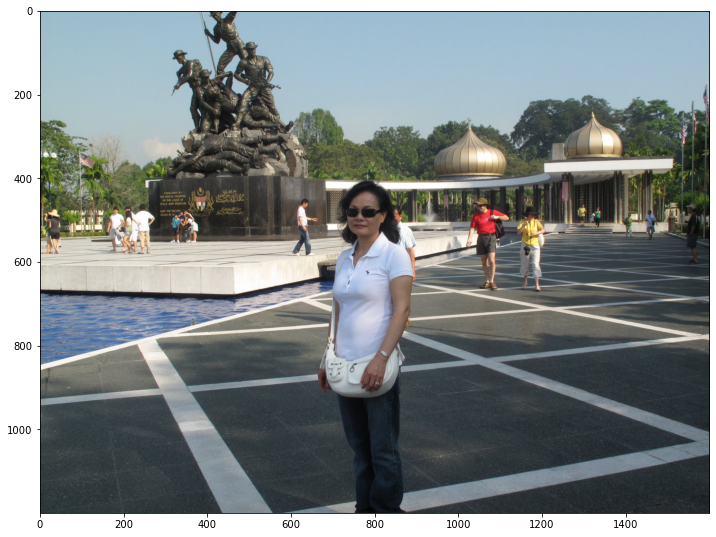

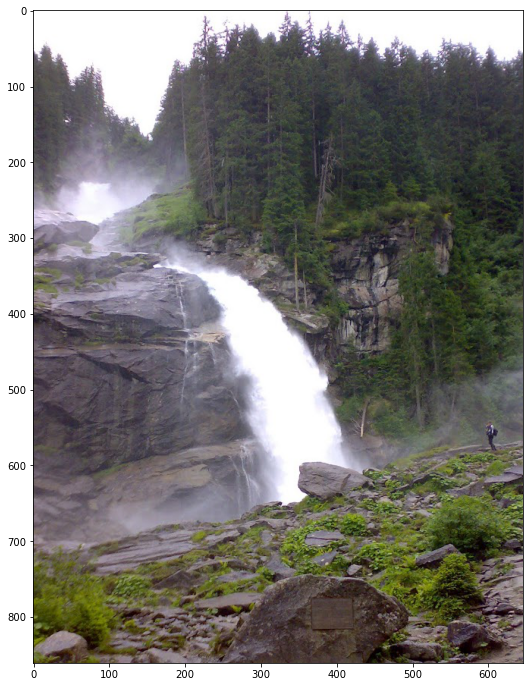

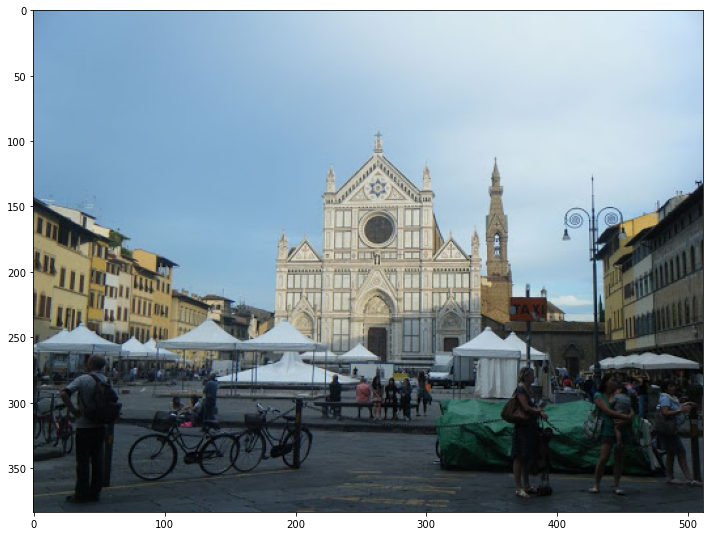

In [84]:
from PIL import Image
import requests
from io import BytesIO

for i in range(len(dfimages)):
    response = requests.get(dfimages['url'][i])
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize= (12,12))
    plt.imshow(img)
    

# Split data in train, test, validation 

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df10.drop("landmark_id", axis=1)
y= df10["landmark_id"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, stratify = y)

In [23]:
X_train

id                                                url
81111  818d18929bafafcf  http://lh6.ggpht.com/-LmDPXGBLe5A/S9WJlOtw5EI/...
9117   b31534c3f4c97be6  https://lh5.googleusercontent.com/-XzPMQ7fM5LU...
2022   83b19b75fa6de024  https://lh5.googleusercontent.com/-Ms0AFmr0mE8...
96709  ae74e13d000a28bb  https://lh6.googleusercontent.com/-zARZubWEH1k...
53277  c7f2b4cde8a96dd5  https://lh3.googleusercontent.com/-Ot25W7Fu7YA...
...                 ...                                                ...
55298  a881249573e6ff8e  https://lh6.googleusercontent.com/-L_VX3XzJGi8...
55008  8d5fe52a8c0fcb6d  https://lh3.googleusercontent.com/-dHikFp3Y07o...
1279   e88d805d33dacd62  http://lh6.ggpht.com/-k8DyV68XoDE/SuhHSnbfnSI/...
81846  3ec784f05e38c55b  https://lh5.googleusercontent.com/-THG5X1k7m8o...
55401  625f73291cce1e14  https://lh6.googleusercontent.com/-bhv1_YJHJA4...

[8705 rows x 2 columns]

In [24]:
y_train

81111    12647
9117      1472
2022       165
96709    13876
53277     7000
         ...  
55298     7008
55008     7008
1279       165
81846    12647
55401     7008
Name: landmark_id, Length: 8705, dtype: string

In [9]:
dftrain = pd.concat( (X_train, y_train), axis=1)

In [30]:
dftrain

id                                                url  \
81111  818d18929bafafcf  http://lh6.ggpht.com/-LmDPXGBLe5A/S9WJlOtw5EI/...   
9117   b31534c3f4c97be6  https://lh5.googleusercontent.com/-XzPMQ7fM5LU...   
2022   83b19b75fa6de024  https://lh5.googleusercontent.com/-Ms0AFmr0mE8...   
96709  ae74e13d000a28bb  https://lh6.googleusercontent.com/-zARZubWEH1k...   
53277  c7f2b4cde8a96dd5  https://lh3.googleusercontent.com/-Ot25W7Fu7YA...   
...                 ...                                                ...   
55298  a881249573e6ff8e  https://lh6.googleusercontent.com/-L_VX3XzJGi8...   
55008  8d5fe52a8c0fcb6d  https://lh3.googleusercontent.com/-dHikFp3Y07o...   
1279   e88d805d33dacd62  http://lh6.ggpht.com/-k8DyV68XoDE/SuhHSnbfnSI/...   
81846  3ec784f05e38c55b  https://lh5.googleusercontent.com/-THG5X1k7m8o...   
55401  625f73291cce1e14  https://lh6.googleusercontent.com/-bhv1_YJHJA4...   

      landmark_id  
81111       12647  
9117         1472  
2022          165  
96709       13876  
53277        7000  
...           ...  
55298        7008  
55008        7008  
1279          165  
81846       12647  
55401        7008  

[8705 rows x 3 columns]

In [10]:
dftrain['landmark_id'].value_counts()

165      1030
1602      995
1472      980
7000      892
13332     860
7008      844
13876     836
152       804
1310      736
12647     728
Name: landmark_id, dtype: Int64

In [42]:
X_test

id                                                url
88085  5be4b9ddd6cc5052  https://lh4.googleusercontent.com/-p3mxw4XA0bw...
87317  3837da8a560a6176  https://lh6.googleusercontent.com/-X-97z1yTN6w...
81774  760541c9ca3df1d6  http://lh6.ggpht.com/-o0Yw0ih_QV4/SWBanW7QbDI/...
54092  f16f954a15f44276  https://lh3.googleusercontent.com/-Sy9vPypWxbA...
141    0670238a29a538be  https://lh5.googleusercontent.com/-pkmjcXXePLQ...
...                 ...                                                ...
921    c2c9b8bf34f99082  http://lh5.ggpht.com/-hPKg9sjXw3I/SfSUKOhYUfI/...
53862  94376964a861533e  https://lh5.googleusercontent.com/-_uRWhFVGWsw...
95827  d5af56528a75349e  https://lh4.googleusercontent.com/-syeUMaE6004...
81037  e4a505b9b4e8ee08  https://lh6.googleusercontent.com/-u57-Ll6sOFQ...
12075  8326325e967a647c  https://lh6.googleusercontent.com/-fq8rMTve7bY...

[2088 rows x 2 columns]

In [11]:
X_test, X_val, y_test, y_val = train_test_split( X_test, y_test, test_size=0.2, stratify = y_test)

In [12]:
dfval = pd.concat( (X_val, y_val), axis=1)

In [14]:
dfval['landmark_id'].value_counts()

165      89
1602     85
1472     84
7000     77
13332    74
7008     72
13876    72
152      69
1310     63
12647    62
Name: landmark_id, dtype: Int64

In [15]:
dftest = pd.concat( (X_test, y_test), axis=1)

In [17]:
dftest['landmark_id'].value_counts()

165      353
1602     341
1472     336
7000     306
13332    294
7008     290
13876    286
152      276
1310     252
12647    250
Name: landmark_id, dtype: Int64

In [8]:
dftrain = dftrain.sort_values("landmark_id")
dftrain

id                                                url  \
4352  f6931b11790edfdf  https://lh4.googleusercontent.com/-qd6ECIBrl2k...   
5211  23c4792fa8af2b12  https://lh5.googleusercontent.com/-NsWF7pOsH_o...   
3105  a266ad866454f883  https://lh3.googleusercontent.com/-bKp4u_pNMpo...   
7341  6b4cd9c8ebd74705  https://lh3.googleusercontent.com/-sQJIwbGDyzU...   
1130  da9e054c55a2d2be  https://lh5.googleusercontent.com/-4u4p-lqUNmQ...   
...                ...                                                ...   
2898  9c5ece0f307aa1c2  https://lh5.googleusercontent.com/-WLGjoisQgJU...   
2895  161e97605a9742f0  https://lh4.googleusercontent.com/-3z6qkmyKcsM...   
906   2f681f9e16d445a9  https://lh5.googleusercontent.com/-ymdkkb_bCWk...   
2889  8dc8b0f3273170cc  https://lh4.googleusercontent.com/-LYTcmLs1yGw...   
4086  60751fc3ece3c91c  http://lh3.ggpht.com/-6rwkpKUpplc/TNeWUbpy9fI/...   

      landmark_id  
4352          152  
5211          152  
3105          152  
7341          152  
1130          152  
...           ...  
2898        13876  
2895        13876  
906         13876  
2889        13876  
4086        13876  

[8705 rows x 3 columns]

In [ ]:
dftrain.to_csv('dftrain.csv', index=False)

In [11]:
dftest = dftest.sort_values("landmark_id")
dftest

id                                                url  \
0     36d724e7958c3e9d  https://lh5.googleusercontent.com/-r6OFD3AL0T0...   
1829  f94d96fa16f0fb9f  https://lh5.googleusercontent.com/-wKWujLY_BvQ...   
1834  061b2fd6ae33faf5  https://lh6.googleusercontent.com/-SdsEvPnEgEk...   
1842  34df2c4fe68b5341  http://lh3.ggpht.com/-HeHdvP9feJc/TDizdQC9HbI/...   
1860  4f75bb58dc80233d  https://lh6.googleusercontent.com/-2IQW20d8I_4...   
...                ...                                                ...   
452   62304c6ec20c07df  https://lh6.googleusercontent.com/-bwjORoClAf4...   
2668  0bb0374d2009688c  http://lh3.ggpht.com/-eYctdqEWYmk/RaEldX5UcsI/...   
2666  f9bf992547e8abf8  http://lh5.ggpht.com/-hRZq6JUEZDw/Tg2Wx7L0l1I/...   
471   becf80a28418e0ed  https://lh6.googleusercontent.com/-DpG7NNONwu4...   
2725  9284f5dedb7ae38e  http://lh4.ggpht.com/-Xn_Mlb4CPjs/R6KUo1_mqZI/...   

      landmark_id  
0             152  
1829          152  
1834          152  
1842          152  
1860          152  
...           ...  
452         13876  
2668        13876  
2666        13876  
471         13876  
2725        13876  

[2984 rows x 3 columns]

In [12]:
dftest.to_csv('dftest.csv', index=False)

In [13]:
dfval = pd.read_csv('dfval.csv')
dfval = dfval.sort_values("landmark_id")
dfval

id                                                url  \
146  29c9cbb94a97d489  https://lh4.googleusercontent.com/-1cDk99UBfKs...   
52   b7da7b7bc6917541  http://lh5.ggpht.com/-bsdTP3XqSvQ/TjsRkrhzyEI/...   
570  cad0e84f5c1a1208  https://lh6.googleusercontent.com/-uHzFHdzjWRw...   
571  242bdd53101d6b28  https://lh4.googleusercontent.com/-WZmB87qC28w...   
445  9723d9d1fc0331e7  https://lh4.googleusercontent.com/-_Xas0ihwr2I...   
..                ...                                                ...   
425  84d4bbda5e39f751  http://lh5.ggpht.com/-D5cTd6FT2jc/RewzRUZHZCI/...   
401  a0d4c7c96af8f1aa  http://lh6.ggpht.com/-hJfCNzQIH4s/TS3DuS-HgvI/...   
397  b87179c7f71e0708  https://lh3.googleusercontent.com/-RVeXVmPo8IU...   
388  2b847c14068b8704  http://lh4.ggpht.com/-mqtksZqv8P8/SrfMM6gRaoI/...   
0    fbb6243a1eec0554  http://lh3.ggpht.com/-Q6T29iNTL5o/SvwD9eK1mCI/...   

     landmark_id  
146          152  
52           152  
570          152  
571          152  
445          152  
..           ...  
425        13876  
401        13876  
397        13876  
388        13876  
0          13876  

[747 rows x 3 columns]

In [14]:
dfval.to_csv('dfval.csv', index=False)

# download train images

In [ ]:
landmarks = ["152","165", "1310", "1472", "1602", "7000", "7008", "12647", "13332", "13876"]

In [25]:
os.getcwd()

'C:\\Users\\zhuzh\\OneDrive\\Рабочий стол\\Neoland\\Finalproject'

In [54]:
os.mkdir('train')

In [22]:
os.chdir('C:\\Users\\zhuzh\\OneDrive\\Рабочий стол\\Neoland\\Finalproject\\train')

In [20]:
landmarks

['152',
 '165',
 '1310',
 '1472',
 '1602',
 '7000',
 '7008',
 '12647',
 '13332',
 '13876']

In [ ]:
chrome_driver = "C:\\Users\\zhuzh\\OneDrive\\Рабочий стол\\Neoland\\Finalproject\\chromedriver.exe"
navegador = webdriver.Chrome(executable_path=chrome_driver) #start the chrome driver
for k in range(len(landmarks)):
    os.mkdir(landmarks[k]) #create a folder with the landmark id name
    os.chdir(landmarks[k]) #enter the created folder
    
    listaurls = []
    for i in dftrain[dftrain['landmark_id']==landmarks[k]]['url']: #take the first url from the list of urls filtered by id
        listaurls.append(i)
    for i in range(len(listaurls)):
        navegador.get(listaurls[i]) #access the link 
        img = listaurls[i]
        resp = requests.get(img, stream=True)
        imagen1 = open(landmarks[k]+ str(i) + '.jpg', 'wb') # save the image with the name of landmark id and number of image
        resp.raw.decode_content = True
        shutil.copyfileobj(resp.raw, imagen1)
        imagen1.close()
    os.chdir("C:\\Users\\zhuzh\\OneDrive\\Рабочий стол\\Neoland\\Finalproject\\train") #return to the general folder 

# Download test images

In [20]:
landmarks = ["152","165", "1310", "1472", "1602", "7000", "7008", "12647", "13332", "13876"]

In [16]:
os.getcwd()

'C:\\Users\\zhuzh\\OneDrive\\Рабочий стол\\Neoland\\Finalproject'

In [17]:
os.mkdir('test')

In [29]:
os.chdir('C:\\Users\\zhuzh\\OneDrive\\Рабочий стол\\Neoland\\Finalproject\\test')

In [ ]:
dftest.info()

In [ ]:
dftest['landmark_id'] = dftest['landmark_id'].astype('string')

In [25]:
chrome_driver = "C:\\Users\\zhuzh\\OneDrive\\Рабочий стол\\Neoland\\Finalproject\\chromedriver.exe"
navegador = webdriver.Chrome(executable_path=chrome_driver)
for k in range(len(landmarks)):
    os.mkdir(landmarks[k])
    os.chdir(landmarks[k])
    
    listaurls = []
    for i in dftest[dftest['landmark_id']==landmarks[k]]['url']:
        listaurls.append(i)
    for i in range(len(listaurls)):
        navegador.get(listaurls[i])
        img = listaurls[i]
        resp = requests.get(img, stream=True)
        imagen1 = open(landmarks[k]+ str(i) + '.jpg', 'wb') 
        resp.raw.decode_content = True
        shutil.copyfileobj(resp.raw, imagen1)
        imagen1.close()
    os.chdir("C:\\Users\\zhuzh\\OneDrive\\Рабочий стол\\Neoland\\Finalproject\\test")

# download validation images

In [35]:
landmarks = ["152","165", "1310", "1472", "1602", "7000", "7008", "12647", "13332", "13876"]
os.getcwd()

'C:\\Users\\zhuzh\\OneDrive\\Рабочий стол\\Neoland\\Finalproject'

In [34]:
os.chdir('C:\\Users\\zhuzh\\OneDrive\\Рабочий стол\\Neoland\\Finalproject')

In [36]:
os.mkdir('validation')

In [37]:
os.chdir('C:\\Users\\zhuzh\\OneDrive\\Рабочий стол\\Neoland\\Finalproject\\validation')

In [40]:
dfval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 146 to 0
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           747 non-null    object
 1   url          747 non-null    object
 2   landmark_id  747 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 23.3+ KB


In [41]:
dfval['landmark_id'] = dfval['landmark_id'].astype('string')

In [42]:
dfval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 146 to 0
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           747 non-null    object
 1   url          747 non-null    object
 2   landmark_id  747 non-null    string
dtypes: object(2), string(1)
memory usage: 23.3+ KB


In [43]:
chrome_driver = "C:\\Users\\zhuzh\\OneDrive\\Рабочий стол\\Neoland\\Finalproject\\chromedriver.exe"
navegador = webdriver.Chrome(executable_path=chrome_driver)
for k in range(len(landmarks)):
    os.mkdir(landmarks[k])
    os.chdir(landmarks[k])
    
    listaurls = []
    for i in dfval[dfval['landmark_id']==landmarks[k]]['url']:
        listaurls.append(i)
    for i in range(len(listaurls)):
        navegador.get(listaurls[i])
        img = listaurls[i]
        resp = requests.get(img, stream=True)
        imagen1 = open(landmarks[k]+ str(i) + '.jpg', 'wb') 
        resp.raw.decode_content = True
        shutil.copyfileobj(resp.raw, imagen1)
        imagen1.close()
    os.chdir("C:\\Users\\zhuzh\\OneDrive\\Рабочий стол\\Neoland\\Finalproject\\validation")

In [44]:
navegador.quit()

In [123]:
dfimages.to_csv('df10.csv', index=False)

# find descriptions and names of our landmarks

In [5]:
train = pd.read_csv('train.csv')

In [6]:
train = train.replace("None", np.nan)
train = train.dropna()
train.sort_values("landmark_id")

id                                                url  \
481414   e7beefaa66e4c762  http://lh5.ggpht.com/-UWVuI3r54YQ/SCSNIHOoyiI/...   
1172601  3104ba012ebd6524  http://lh5.ggpht.com/-s85XaLYLL4k/SY6G0zNvqFI/...   
1188362  89735d6bd3ed3a82  https://lh6.googleusercontent.com/-W7Z0zPkBKWw...   
784064   92616a7dab885214  https://lh6.googleusercontent.com/-A2SKtYj89pQ...   
501305   90187c0b6f3fa112  https://lh4.googleusercontent.com/-ciIvVoX0BZs...   
...                   ...                                                ...   
120544   417f552fc64d0d9b  https://lh6.googleusercontent.com/-ahfl9rBIBKs...   
1085470  05b4457c7e608cc6  https://lh6.googleusercontent.com/-V1C_5fDLq1Q...   
381955   cc09f168437660a9  http://lh3.ggpht.com/-cbju1jZbB70/SLLlh-8ZyKI/...   
859762   aaf4760a9dde0c5a  https://lh5.googleusercontent.com/-oTvORLCZxPI...   
452257   5d523edb88d54c4c  http://mw2.google.com/mw-panoramio/photos/medi...   

        landmark_id  
481414            0  
1172601           0  
1188362           0  
784064            0  
501305            0  
...             ...  
120544         9999  
1085470        9999  
381955         9999  
859762         9999  
452257         9999  

[1154591 rows x 3 columns]

In [7]:
dfnames = pd.DataFrame(columns = train.columns)
dfnames

Empty DataFrame
Columns: [id, url, landmark_id]
Index: []

In [ ]:
dfnames = pd.DataFrame(columns = train.columns) #take the first link from the file in order to search for it and find name and desc
for i in train['landmark_id'].unique():
    a = train[train['landmark_id']==i].head(1)
    dfnames = pd.concat((dfnames,a),axis=0)

In [ ]:
dfnames= dfnames.reset_index(drop=True).sort_values('landmark_id')

In [ ]:
dfnames.to_csv('dfnamesurls.csv',index= False)

In [8]:
dfnames = pd.read_csv('dfnamesurls.csv')
dfnames

id                                                url  \
0      e1b812def4966754  http://lh6.ggpht.com/-JG99RdcTxhs/RyTNVRvYmJI/...   
1      d4cdaa5e9779612c  https://lh4.googleusercontent.com/-QnA5uPKL0L4...   
2      e6cdf2e84ea356ca  https://lh4.googleusercontent.com/-fe6GquiW284...   
3      a02a2ea7cb8a1a5c  http://lh6.ggpht.com/-VFIZgjjoAkk/Tca04pf9OTI/...   
4      451a46d11335928c  https://lh3.googleusercontent.com/-XIKsXblU8Tg...   
...                 ...                                                ...   
14939  0c740d1342116a2f  http://lh4.ggpht.com/-GNdLqMr8BAw/R2tCq1CpJuI/...   
14940  ba514065d44ec8ff  http://lh5.ggpht.com/-oeAT_-3GOCA/Tjn996-ETiI/...   
14941  ed2df79ac1f3b4b7  http://mw2.google.com/mw-panoramio/photos/medi...   
14942  5afd1b6c3a65818a  http://mw2.google.com/mw-panoramio/photos/medi...   
14943  15bd42d4b5188f0e  http://lh4.ggpht.com/-PpXasm5VGeo/RS6Cq9sWABI/...   

       landmark_id  
0                0  
1                1  
2               10  
3              100  
4             1000  
...            ...  
14939         9995  
14940         9996  
14941         9997  
14942         9998  
14943         9999  

[14944 rows x 3 columns]

In [3]:
df = pd.read_csv('df10.csv') #to get our 10 classes and descriptions
df['landmark_id'].unique()

array([12647,  1310, 13332, 13876,  1472,   152,  1602,   165,  7000,
        7008], dtype=int64)

In [9]:
%%time
names= []
desc = []

chrome_driver = "C:\\Users\\zhuzh\\OneDrive\\Рабочий стол\\Neoland\\Finalproject\\chromedriver.exe"
navegador = webdriver.Chrome(executable_path=chrome_driver) #create chrome driver 

for i in df['landmark_id'].unique():
    try:
        
        navegador.get('https://www.google.com/imghp?hl=EN') #go to google image search page
        navegador.find_element_by_xpath('//*[@id="sbtc"]/div/div[3]/div[2]/span').click() #click on search by image
        navegador.find_element_by_xpath('//*[@id="Ycyxxc"]').send_keys(dfnames[dfnames['landmark_id']==i].reset_index(drop=True)['url'][0])
        #pass the image url to the search box
        navegador.find_element_by_xpath('//*[@id="RZJ9Ub"]').click() #click on search
        sleep(3)
        source = navegador.page_source
        soup = BeautifulSoup(source) #create a "soup" from the opened page
        name = soup.find_all('h2')[-1].find('span').text #save the name of the landmark
        names.append(name)
        description = soup.find("div", class_= "kno-rdesc").find('span').text #save description of the landmark
        desc.append(description)
        navegador.back()

    except:
        names.append(np.nan) #in case of error, save nan
        desc.append(np.nan)

Wall time: 1min 9s


In [10]:
names

['The Albert Memorial',
 'Boldt Castle & Boldt Yacht House',
 "Waipi'o Valley",
 'Büyük Mecidiye Mosque (Ortaköy Mosque)',
 'Whitehaven Beach',
 '30 St Mary Axe (The Gherkin)',
 'Selinunte',
 'Tugu Negara',
 'Krimml Waterfalls',
 'Basilica of Santa Croce in Florence']

In [11]:
desc

['The Albert Memorial, directly north of the Royal Albert Hall in Kensington Gardens, London, was commissioned by Queen Victoria in memory of her beloved husband Prince Albert, who died in 1861.',
 'Boldt Castle is a major landmark and tourist attraction in the Thousand Islands region of the U.S. state of New York. Open to guests seasonally between mid May and mid October, it is located on Heart Island in the Saint Lawrence River. Heart Island is part of the Town of Alexandria, in Jefferson County.',
 'Waipiʻo Valley is a valley located in the Hamakua District of the Big Island of Hawaiʻi. "Waipiʻo" means "curved water" in the Hawaiian language.\nThe valley was the capital and permanent residence of many early Hawaiian Aliʻi up until the time of King ʻUmi.',
 'Ortaköy Mosque officially the Büyük Mecidiye Camii in Beşiktaş, Istanbul, Turkey, is situated at the waterside of the Ortaköy pier square, one of the most popular locations on the Bosphorus.',
 "Whitehaven Beach is a 7;km stretch

In [12]:
df['names'] = names
df['descriptions'] = desc
df

id                                                url  \
0  9a4c6194c17b0f0e  http://lh3.ggpht.com/-Cgm3B75leMc/Rby5jWz11eI/...   
1  3012983766fb64aa  https://lh4.googleusercontent.com/-9xpUMMQ1gkM...   
2  13ca2695a2a605e5  https://lh6.googleusercontent.com/-iQ3HNSX7OQY...   
3  87bb139b90ee08d9  http://lh6.ggpht.com/-dYuul3_QB9w/Rw_dWr2Y8mI/...   
4  5ae74004b132839b  https://lh4.googleusercontent.com/-uG5vVA8sJp8...   
5  224d07dda87c1437  https://lh3.googleusercontent.com/-unDLIDYF4No...   
6  57e8aa04767675c3  http://lh4.ggpht.com/-UCUfsf-EtOs/SPqSYBBFoDI/...   
7  456ea29c5b957ddf  http://lh3.ggpht.com/-fK5E-UyAeBE/SaP3CzysQKI/...   
8  838df77cfe399ee9  https://lh3.googleusercontent.com/-ppgOps6SW3I...   
9  c11c82b7349ab18b  https://lh6.googleusercontent.com/-LI7oUawnuq0...   

   landmark_id                                   names  \
0        12647                     The Albert Memorial   
1         1310        Boldt Castle & Boldt Yacht House   
2        13332                          Waipi'o Valley   
3        13876  Büyük Mecidiye Mosque (Ortaköy Mosque)   
4         1472                        Whitehaven Beach   
5          152            30 St Mary Axe (The Gherkin)   
6         1602                               Selinunte   
7          165                             Tugu Negara   
8         7000                       Krimml Waterfalls   
9         7008     Basilica of Santa Croce in Florence   

                                        descriptions  
0  The Albert Memorial, directly north of the Roy...  
1  Boldt Castle is a major landmark and tourist a...  
2  Waipiʻo Valley is a valley located in the Hama...  
3  Ortaköy Mosque officially the Büyük Mecidiye C...  
4  Whitehaven Beach is a 7;km stretch along Islan...  
5  30 St Mary Axe, informally known as The Gherki...  
6  Selinunte was an ancient Greek city on the sou...  
7  The National Monument is a sculpture that comm...  
8  The Krimml Waterfalls, with a total height of ...  
9  The Basilica di Santa Croce is the principal F...

In [17]:
df['descriptions'][9]

'The Basilica di Santa Croce is the principal Franciscan church in Florence, Italy, and a minor basilica of the Roman Catholic Church. It is situated on the Piazza di Santa Croce, about 800 meters south-east of the Duomo. The site, when first chosen, was in marshland outside the city walls.'

In [16]:
df['descriptions'][2] #there is a n/ only in this description 

'Waipiʻo Valley is a valley located in the Hamakua District of the Big Island of Hawaiʻi. "Waipiʻo" means "curved water" in the Hawaiian language.\nThe valley was the capital and permanent residence of many early Hawaiian Aliʻi up until the time of King ʻUmi.'

In [20]:
df['descriptions'][2].split('\n')[0] + ' ' + df['descriptions'][2].split('\n')[1]

'Waipiʻo Valley is a valley located in the Hamakua District of the Big Island of Hawaiʻi. "Waipiʻo" means "curved water" in the Hawaiian language. The valley was the capital and permanent residence of many early Hawaiian Aliʻi up until the time of King ʻUmi.'

In [21]:
df.iat[2,-1] = df['descriptions'][2].split('\n')[0] + ' ' + df['descriptions'][2].split('\n')[1]

In [22]:
df['descriptions'][2]

'Waipiʻo Valley is a valley located in the Hamakua District of the Big Island of Hawaiʻi. "Waipiʻo" means "curved water" in the Hawaiian language. The valley was the capital and permanent residence of many early Hawaiian Aliʻi up until the time of King ʻUmi.'

In [ ]:
df.to_csv('landmarknames.csv', index=False)